In [80]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [110]:
#Read dataset
redwine_data = pd.read_csv('winequality-red.csv',sep=';')
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
redwine_data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity',\
                            'citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':\
                             'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [23]:
redwine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
#Checking nulls
redwine_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_categorical     0
dtype: int64

In [27]:
#Summary
redwine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


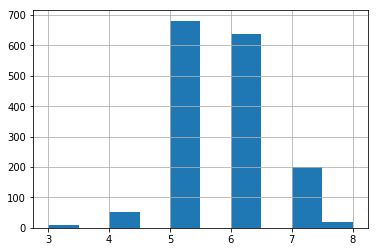

In [79]:
#Find range for quality attribute
# redwine_data['quality'].value_counts().sort_index()
redwine_data['quality'].hist()
plt.show()

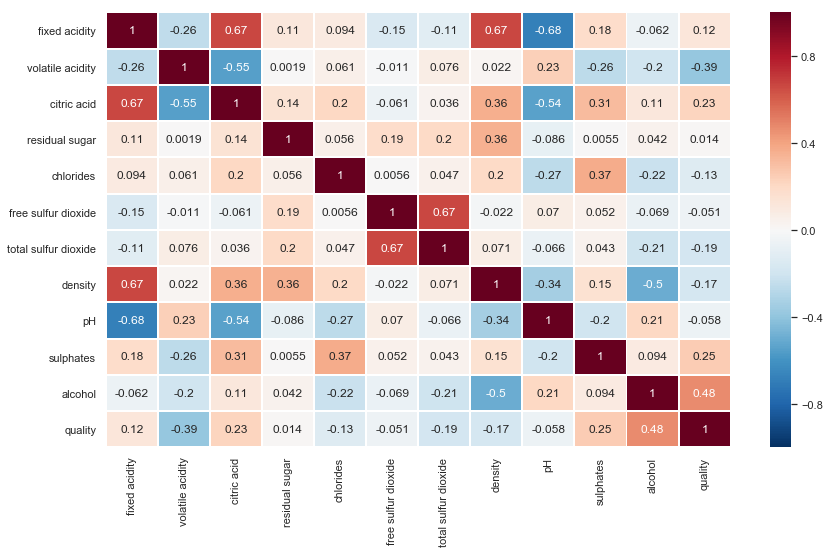

In [153]:
#Feature selection using Pearson correlation
#Filter Method
corr = redwine_data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, linewidths=1, vmin=-1, cmap='RdBu_r')
plt.show()

In [173]:
#Correlation of features with wine quality
corr_target = abs(corr["quality"])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.1]
relevant_features.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
Name: quality, dtype: float64

In [179]:
#Correlation between selected features
print(redwine_data[["alcohol","volatile acidity","sulphates","citric acid","total sulfur dioxide",\
                    "density","chlorides","fixed acidity"]].corr())

                       alcohol  volatile acidity  sulphates  citric acid  \
alcohol               1.000000         -0.202288   0.093595     0.109903   
volatile acidity     -0.202288          1.000000  -0.260987    -0.552496   
sulphates             0.093595         -0.260987   1.000000     0.312770   
citric acid           0.109903         -0.552496   0.312770     1.000000   
total sulfur dioxide -0.205654          0.076470   0.042947     0.035533   
density              -0.496180          0.022026   0.148506     0.364947   
chlorides            -0.221141          0.061298   0.371260     0.203823   
fixed acidity        -0.061668         -0.256131   0.183006     0.671703   

                      total sulfur dioxide   density  chlorides  fixed acidity  
alcohol                          -0.205654 -0.496180  -0.221141      -0.061668  
volatile acidity                  0.076470  0.022026   0.061298      -0.256131  
sulphates                         0.042947  0.148506   0.371260       0.

Let us look for correlation above 60%. 
* volatile acidity and chloride are correlated. We will keep volatile acidity. 
* citric acid and fixed acidity are correlated. We will keep citric acid. 
* density and fixed acidity are correlated. We will ignore both since we already chose citric acid.

#### Final list of important features

In [181]:
imp_features = redwine_data.loc[:,["alcohol","volatile acidity","sulphates","citric acid","total sulfur dioxide","quality"]]
imp_features.head()

,alcohol,volatile acidity,sulphates,citric acid,total sulfur dioxide,quality
0,9.4,0.70,0.56,0.00,34.0,5
1,9.8,0.88,0.68,0.00,67.0,5
2,9.8,0.76,0.65,0.04,54.0,5
3,9.8,0.28,0.58,0.56,60.0,6
4,9.4,0.70,0.56,0.00,34.0,5


In [137]:
# #Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
# bins = [1,4,6,10]
# #0 for low quality, 1 for average, 2 for great quality
# quality_labels=[0,1,2]
# redwine_data['quality_categorical'] = pd.cut(redwine_data['quality'], bins=bins, labels=quality_labels, include_lowest=True)
# #Displays the first 2 columns
# # display(redwine_data.head(n=10))
# redwine_data.head(10)

In [136]:
# features_raw_new = redwine_data.drop(['quality'], axis = 1)
# features_raw_new.head()

In [131]:
# imp_features_raw_new = features_raw_new.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity','quality_categorical']]
# imp_features_raw_new.head()

In [135]:
# # Plot
# sb.pairplot(imp_features_raw_new, hue='quality_categorical')
# ;

In [133]:
# features_raw_new['quality_categorical'].value_counts()

In [132]:
# # Plot
# sb.pairplot(features_raw_new, hue='quality_categorical')
# ;

# Model Selection
Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [111]:
X = redwine_data.drop('quality',1)   #Feature Matrix
y = redwine_data['quality'].values.reshape(-1, 1)         #Target Variable
print(X.shape,y.shape)

(1599, 11) (1599, 1)


In [112]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [114]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [115]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
# sb.set(style="whitegrid")
# sb.residplot(model.predict(X), model.predict(X)-y, lowess=True, color="g")
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0.5, 1.0, 'Residual Plot')

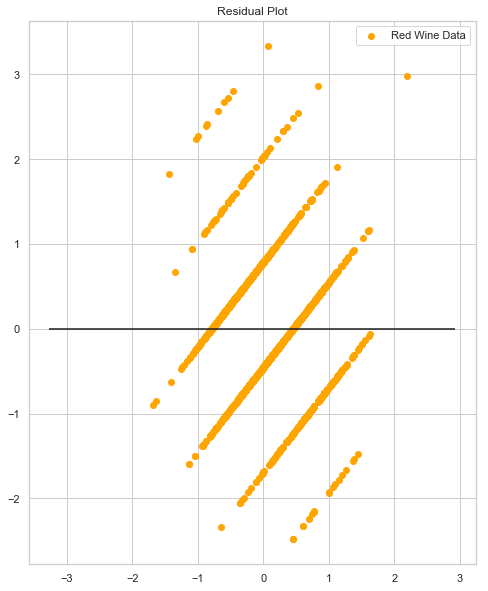

In [128]:
plt.scatter(model.predict(X_scaled), model.predict(X_scaled) - y_scaled, c="orange", label="Red Wine Data")
plt.legend()
plt.hlines(y=0, xmin=y_scaled.min(), xmax=y_scaled.max())
plt.title("Residual Plot")

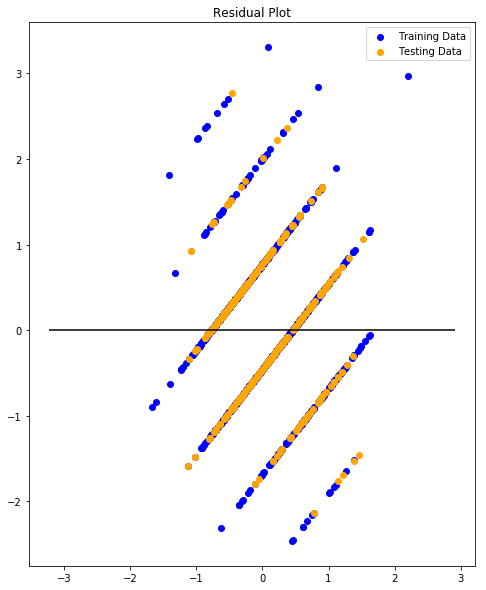

In [116]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
In our case, a non-linear model is appropriate

In [151]:
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=.01).fit(X_scaled, y_scaled)
predictions = lasso.predict(X_scaled)
MSE = mean_squared_error(y_scaled, predictions)
r2 = lasso.score(X_scaled, y_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6416090573722283, R2: 0.3583909426277718


In [154]:
# >>> from sklearn.linear_model import LassoCV
# >>> from sklearn.datasets import make_regression
# >>> X, y = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y) 
# reg.predict(X[:1,])

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.34344812267910885

In [164]:
reg = LassoCV()
reg.fit(X_scaled, y_scaled)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_scaled,y_scaled))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.008321
Best score using built-in LassoCV: 0.358862


C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [165]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 2 variables


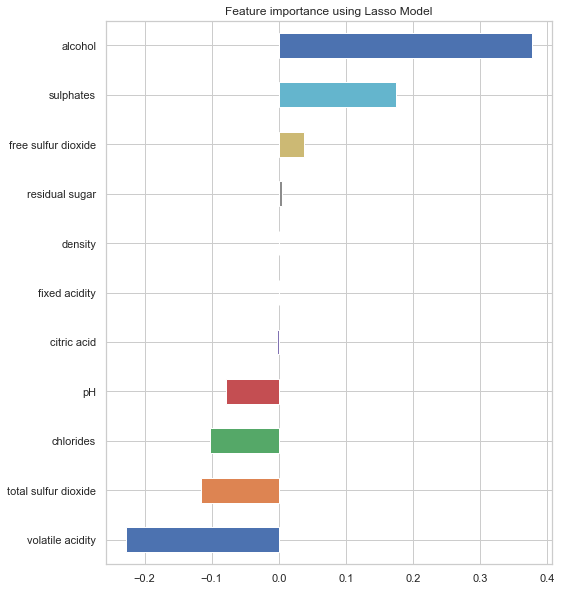

In [166]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

C:\Users\18137\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


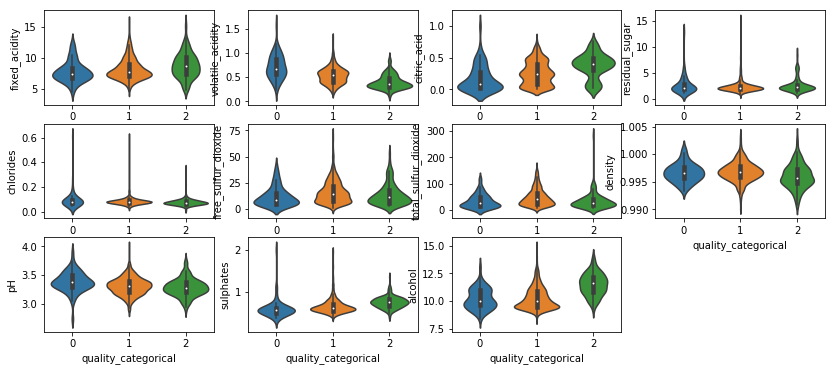

In [38]:
#
plt.figure(figsize=(14,8))

for column_index, column in enumerate(features_raw_new.columns):
    if column == 'quality_categorical':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.violinplot(x='quality_categorical', y=column, data=features_raw_new)

In [ ]:
plt.figure(figsize=(8,6))
sb.violinplot(x='quality_categorical', y='alcohol', data=redwine_data)

In [ ]:
sb.boxplot(x='quality_categorical', y='alcohol', data=redwine_data)

In [ ]:
plt.figure(figsize=(8,6))
sb.violinplot(x='quality_categorical', y='volatile_acidity', data=redwine_data)

In [ ]:
sb.boxplot(x='quality_categorical', y='volatile_acidity', data=redwine_data)

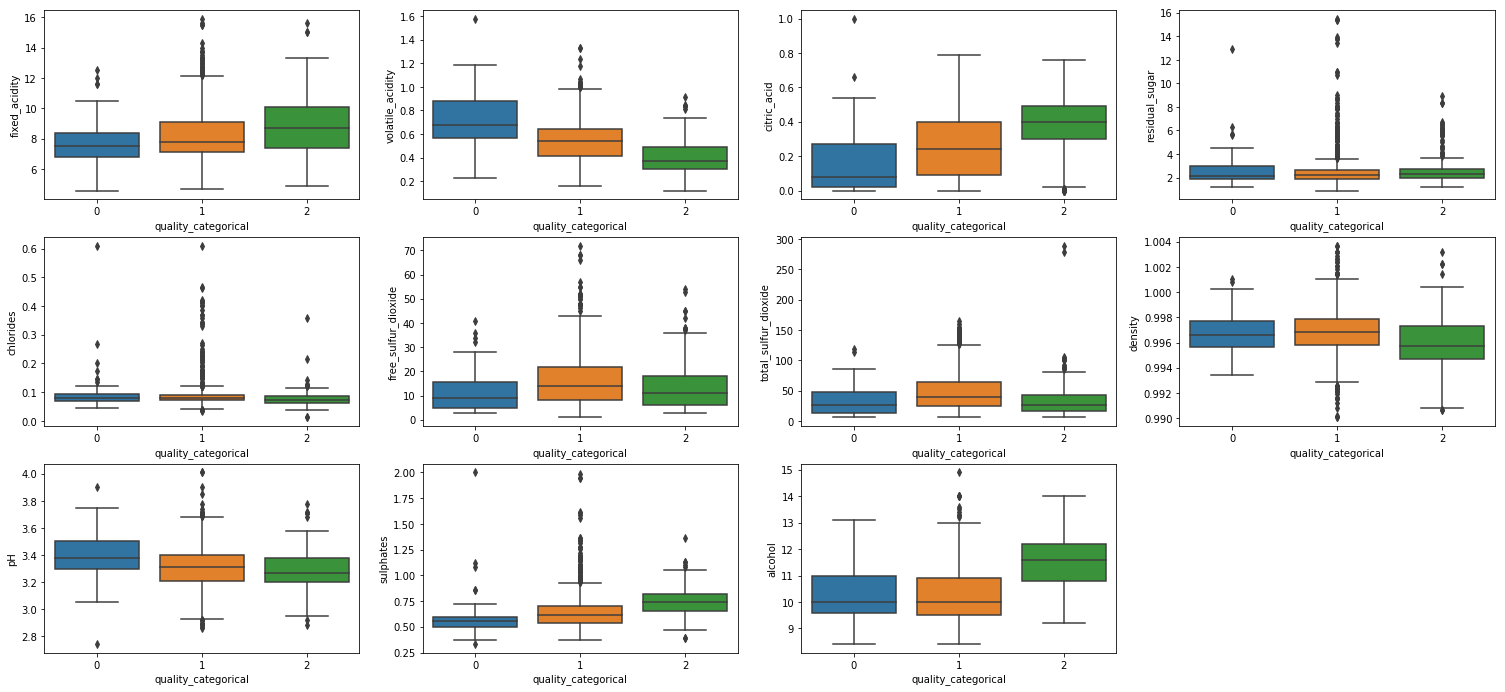

In [39]:
#
plt.figure(figsize=(26,16))

for column_index, column in enumerate(features_raw_new.columns):
    if column == 'quality_categorical':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.boxplot(x='quality_categorical', y=column, data=features_raw_new)

In [62]:
#alcohol, volatile_acidity, citric_acid, suphates
redwine_data[redwine_data.residual_sugar > 3.8]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.200000,5,1
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4,0
33,6.9,0.605,0.12,10.70,0.073,40.0,83.0,0.99930,3.45,0.52,9.400000,6,1
35,7.8,0.645,0.00,5.50,0.086,5.0,18.0,0.99860,3.40,0.55,9.600000,6,1
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,1
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,1
57,7.5,0.630,0.12,5.10,0.111,50.0,110.0,0.99830,3.26,0.77,9.400000,5,1
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,1


In [ ]:
data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)